In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from ydata_profiling import ProfileReport
import ipywidgets

#Importancion de Geopandas
import geopandas as gpd
from shapely.geometry import Point
import folium
from folium import plugins

# Visualizacion de datos perdidos o NaN
import missingno as msngo

In [2]:
sample = pd.read_csv('datasets/sample_submission.csv')
test = pd.read_csv('datasets/test.csv')
train = pd.read_csv('datasets/train.csv')

In [3]:
sample.head(5)

ID_LAT_LON_YEAR_WEEK  emission
0  ID_-0.510_29.290_2022_00     81.94
1  ID_-0.510_29.290_2022_01     81.94
2  ID_-0.510_29.290_2022_02     81.94
3  ID_-0.510_29.290_2022_03     81.94
4  ID_-0.510_29.290_2022_04     81.94

In [4]:
test.head(5)

ID_LAT_LON_YEAR_WEEK  latitude  longitude  year  week_no  \
0  ID_-0.510_29.290_2022_00     -0.51      29.29  2022        0   
1  ID_-0.510_29.290_2022_01     -0.51      29.29  2022        1   
2  ID_-0.510_29.290_2022_02     -0.51      29.29  2022        2   
3  ID_-0.510_29.290_2022_03     -0.51      29.29  2022        3   
4  ID_-0.510_29.290_2022_04     -0.51      29.29  2022        4   

   SulphurDioxide_SO2_column_number_density  \
0                                       NaN   
1                                  0.000456   
2                                  0.000161   
3                                  0.000350   
4                                 -0.000317   

   SulphurDioxide_SO2_column_number_density_amf  \
0                                           NaN   
1                                      0.691164   
2                                      0.605107   
3                                      0.696917   
4                                      0.580527   

   SulphurDioxide_SO2_slant_column_number_density  \
0                                             NaN   
1                                        0.000316   
2                                        0.000106   
3                                        0.000243   
4                                       -0.000184   

   SulphurDioxide_cloud_fraction  SulphurDioxide_sensor_azimuth_angle  ...  \
0                            NaN                                  NaN  ...   
1                       0.000000                            76.239196  ...   
2                       0.079870                           -42.055341  ...   
3                       0.201028                            72.169566  ...   
4                       0.204352                            76.190865  ...   

   Cloud_cloud_top_pressure  Cloud_cloud_top_height  \
0              36022.027344             8472.313477   
1              48539.737242             6476.147323   
2              34133.080469             8984.795703   
3              50854.991076             6014.724059   
4              46594.685145             6849.280477   

   Cloud_cloud_base_pressure  Cloud_cloud_base_height  \
0               41047.937500              7472.313477   
1               54915.708579              5476.147161   
2               39006.093750              7984.795703   
3               57646.368368              5014.724115   
4               52896.541873              5849.280394   

   Cloud_cloud_optical_depth  Cloud_surface_albedo  \
0                   7.935617              0.240773   
1                  11.448437              0.293119   
2                  10.753179              0.267130   
3                  11.764556              0.304679   
4                  13.065317              0.284221   

   Cloud_sensor_azimuth_angle  Cloud_sensor_zenith_angle  \
0                 -100.113792                  33.697044   
1                  -30.510319                  42.402593   
2                   39.087361                  45.936480   
3                  -24.465127                  42.140419   
4                  -12.907850                  30.122641   

   Cloud_solar_azimuth_angle  Cloud_solar_zenith_angle  
0                -133.047546                 33.779583  
1                -138.632822                 31.012380  
2                -144.784988                 26.743361  
3                -135.027891                 29.604774  
4                -135.500119                 26.276807  

[5 rows x 75 columns]

In [5]:
train.head(5)

ID_LAT_LON_YEAR_WEEK  latitude  longitude  year  week_no  \
0  ID_-0.510_29.290_2019_00     -0.51      29.29  2019        0   
1  ID_-0.510_29.290_2019_01     -0.51      29.29  2019        1   
2  ID_-0.510_29.290_2019_02     -0.51      29.29  2019        2   
3  ID_-0.510_29.290_2019_03     -0.51      29.29  2019        3   
4  ID_-0.510_29.290_2019_04     -0.51      29.29  2019        4   

   SulphurDioxide_SO2_column_number_density  \
0                                 -0.000108   
1                                  0.000021   
2                                  0.000514   
3                                       NaN   
4                                 -0.000079   

   SulphurDioxide_SO2_column_number_density_amf  \
0                                      0.603019   
1                                      0.728214   
2                                      0.748199   
3                                           NaN   
4                                      0.676296   

   SulphurDioxide_SO2_slant_column_number_density  \
0                                       -0.000065   
1                                        0.000014   
2                                        0.000385   
3                                             NaN   
4                                       -0.000048   

   SulphurDioxide_cloud_fraction  SulphurDioxide_sensor_azimuth_angle  ...  \
0                       0.255668                           -98.593887  ...   
1                       0.130988                            16.592861  ...   
2                       0.110018                            72.795837  ...   
3                            NaN                                  NaN  ...   
4                       0.121164                             4.121269  ...   

   Cloud_cloud_top_height  Cloud_cloud_base_pressure  Cloud_cloud_base_height  \
0             3664.436218               61085.809570              2615.120483   
1             3651.190311               66969.478735              3174.572424   
2             4216.986492               60068.894448              3516.282669   
3             5228.507736               51064.547339              4180.973322   
4             3980.598120               63751.125781              3355.710107   

   Cloud_cloud_optical_depth  Cloud_surface_albedo  \
0                  15.568533              0.272292   
1                   8.690601              0.256830   
2                  21.103410              0.251101   
3                  15.386899              0.262043   
4                   8.114694              0.235847   

   Cloud_sensor_azimuth_angle  Cloud_sensor_zenith_angle  \
0                  -12.628986                  35.632416   
1                   30.359375                  39.557633   
2                   15.377883                  30.401823   
3                  -11.293399                  24.380357   
4                   38.532263                  37.392979   

   Cloud_solar_azimuth_angle  Cloud_solar_zenith_angle  emission  
0                -138.786423                 30.752140  3.750994  
1                -145.183930                 27.251779  4.025176  
2                -142.519545                 26.193296  4.231381  
3                -132.665828                 28.829155  4.305286  
4                -141.509805                 22.204612  4.347317  

[5 rows x 76 columns]

In [6]:
# Revisamos la cantidad de columnas y filas del registros de los datasets
sample.shape, train.shape, test.shape

((24353, 2), (79023, 76), (24353, 75))

In [7]:
# Revisamos el tipo de datos del dataset de validación
sample.dtypes

ID_LAT_LON_YEAR_WEEK     object
emission                float64
dtype: object

In [8]:
# Revisamos el tipo de datos del dataset de entrenamiento
train.dtypes

ID_LAT_LON_YEAR_WEEK           object
latitude                      float64
longitude                     float64
year                            int64
week_no                         int64
                               ...   
Cloud_sensor_azimuth_angle    float64
Cloud_sensor_zenith_angle     float64
Cloud_solar_azimuth_angle     float64
Cloud_solar_zenith_angle      float64
emission                      float64
Length: 76, dtype: object

<Axes: >

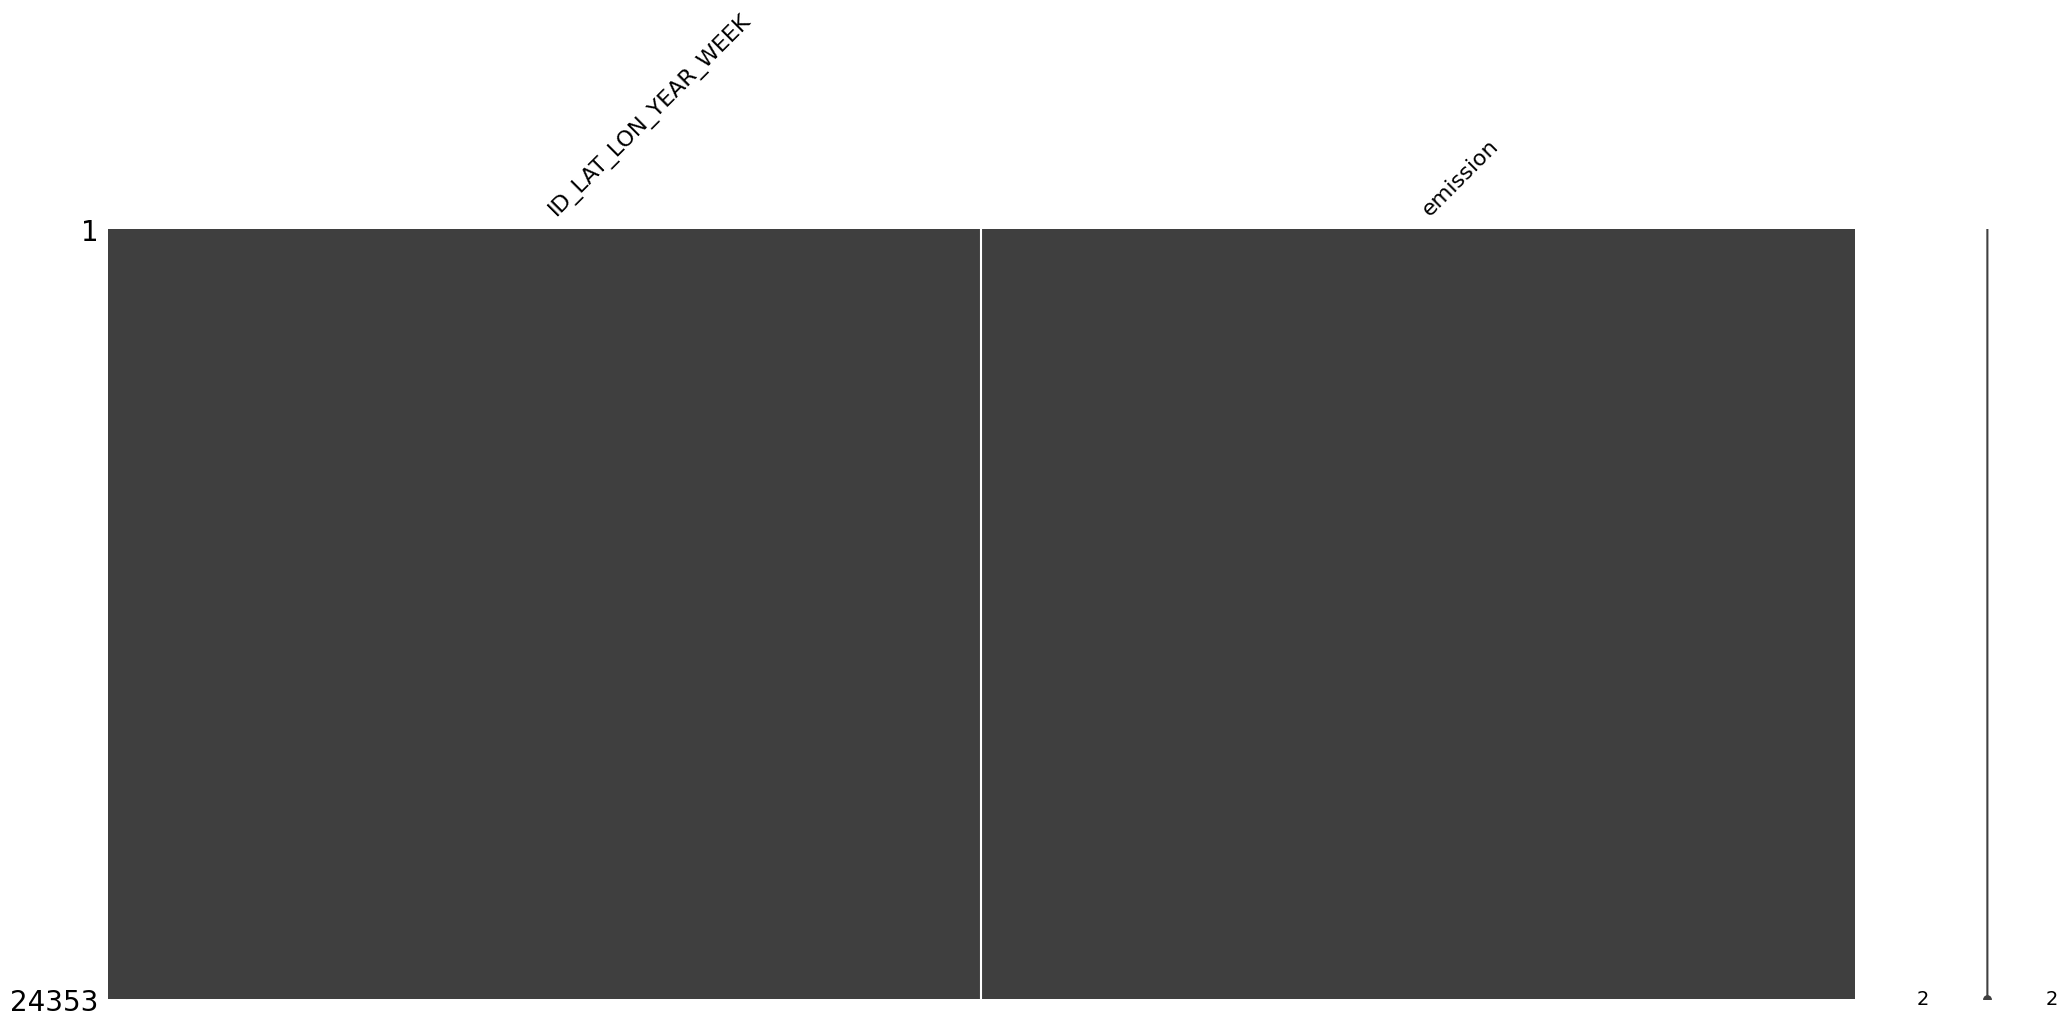

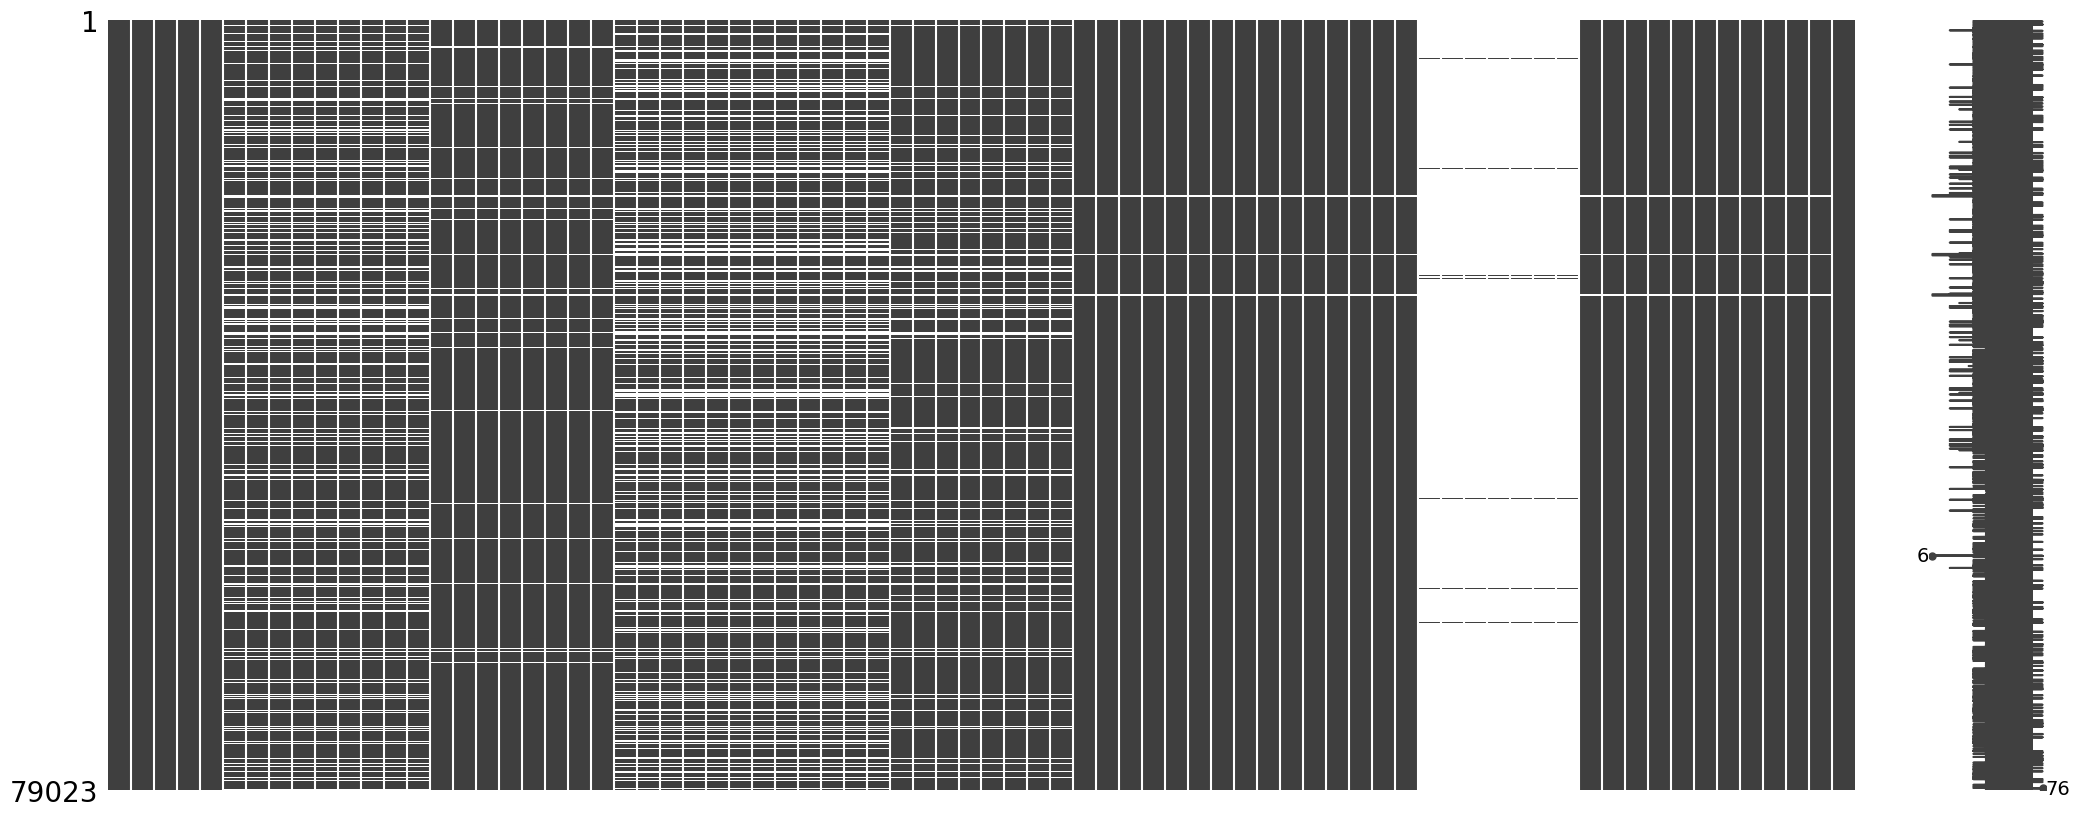

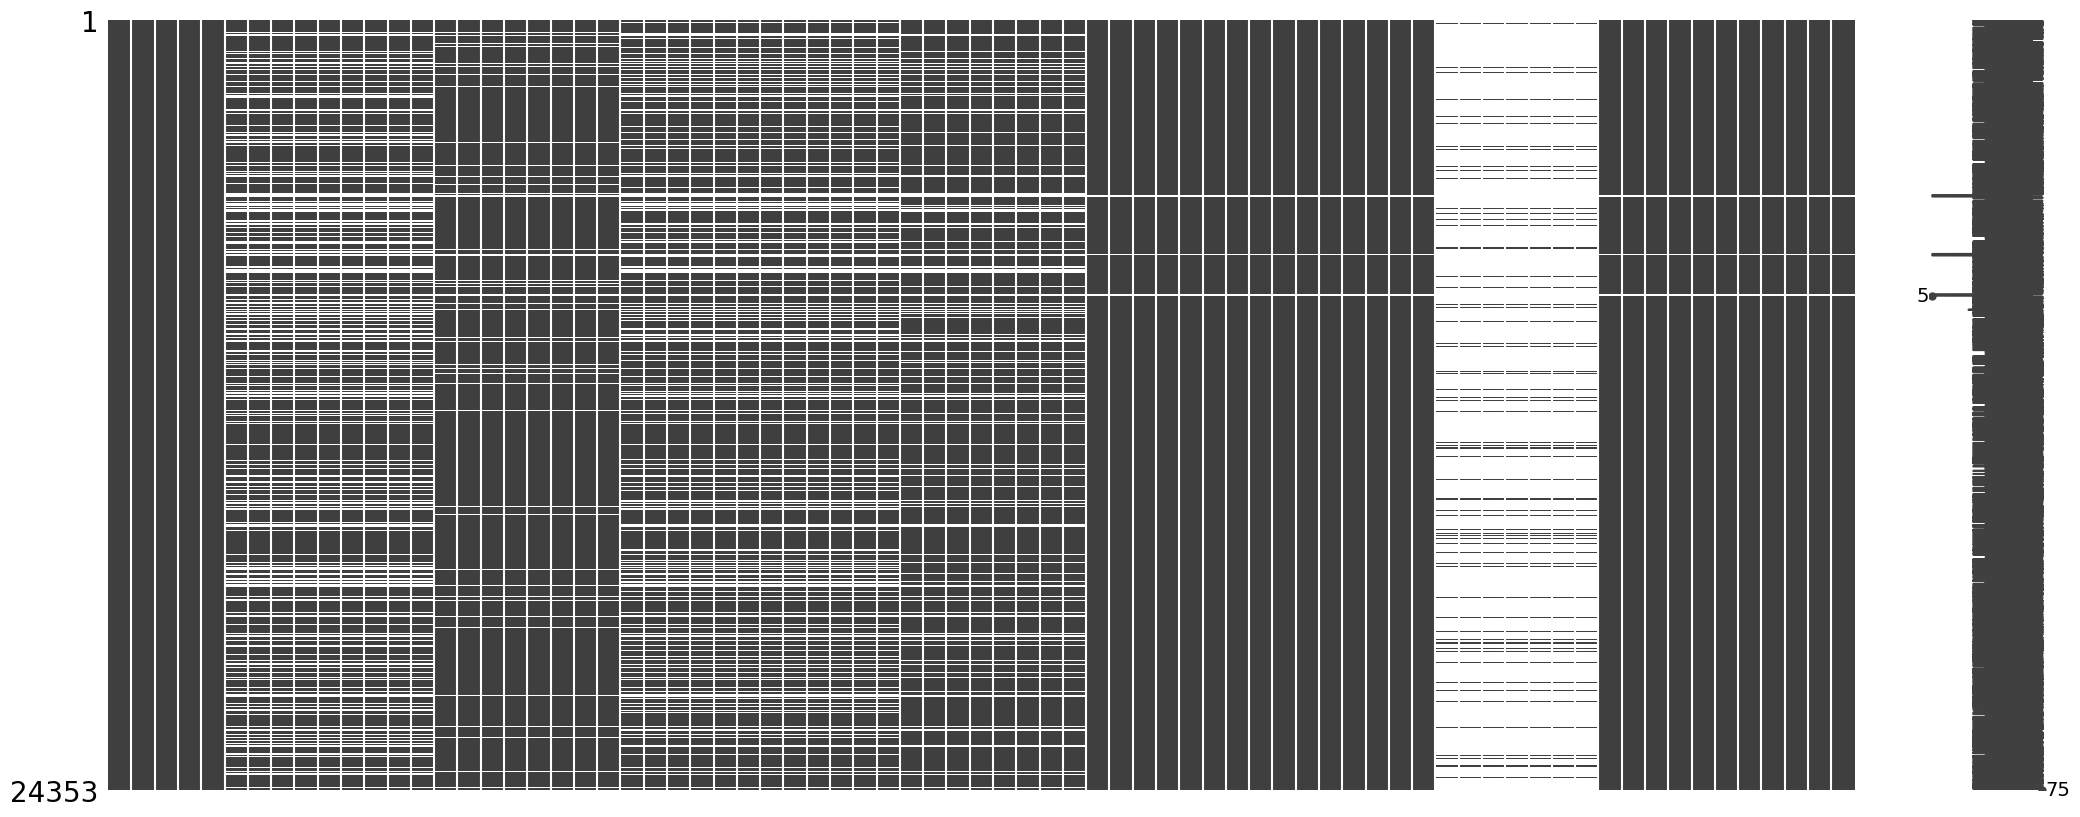

In [9]:
# Matriz grafica de datos nulos
msngo.matrix(sample)
msngo.matrix(train)
msngo.matrix(test)

In [10]:
profile = ProfileReport(train, title="Profiling Report", minimal = True)

In [11]:
#profile.to_file("report.html")
#profile.to_widgets()
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [12]:
train.describe(include='all')

ID_LAT_LON_YEAR_WEEK      latitude     longitude          year  \
count                      79023  79023.000000  79023.000000  79023.000000   
unique                     79023           NaN           NaN           NaN   
top     ID_-0.510_29.290_2019_00           NaN           NaN           NaN   
freq                           1           NaN           NaN           NaN   
mean                         NaN     -1.891072     29.880155   2020.000000   
std                          NaN      0.694522      0.810375      0.816502   
min                          NaN     -3.299000     28.228000   2019.000000   
25%                          NaN     -2.451000     29.262000   2019.000000   
50%                          NaN     -1.882000     29.883000   2020.000000   
75%                          NaN     -1.303000     30.471000   2021.000000   
max                          NaN     -0.510000     31.532000   2021.000000   

             week_no  SulphurDioxide_SO2_column_number_density  \
count   79023.000000                              64414.000000   
unique           NaN                                       NaN   
top              NaN                                       NaN   
freq             NaN                                       NaN   
mean       26.000000                                  0.000048   
std        15.297155                                  0.000272   
min         0.000000                                 -0.000996   
25%        13.000000                                 -0.000096   
50%        26.000000                                  0.000024   
75%        39.000000                                  0.000153   
max        52.000000                                  0.004191   

        SulphurDioxide_SO2_column_number_density_amf  \
count                                   64414.000000   
unique                                           NaN   
top                                              NaN   
freq                                             NaN   
mean                                        0.834848   
std                                         0.185382   
min                                         0.241822   
25%                                         0.705817   
50%                                         0.809118   
75%                                         0.942792   
max                                         1.885239   

        SulphurDioxide_SO2_slant_column_number_density  \
count                                     64414.000000   
unique                                             NaN   
top                                                NaN   
freq                                               NaN   
mean                                          0.000035   
std                                           0.000206   
min                                          -0.000887   
25%                                          -0.000078   
50%                                           0.000019   
75%                                           0.000121   
max                                           0.004236   

        SulphurDioxide_cloud_fraction  SulphurDioxide_sensor_azimuth_angle  \
count                    64414.000000                         64414.000000   
unique                            NaN                                  NaN   
top                               NaN                                  NaN   
freq                              NaN                                  NaN   
mean                         0.158418                            -7.925870   
std                          0.071364                            64.263368   
min                          0.000000                          -179.537059   
25%                          0.110535                           -56.782383   
50%                          0.161855                           -12.441726   
75%                          0.211824                            72.059990   
max                          0.299998                 

In [13]:
train.fillna(0) 

ID_LAT_LON_YEAR_WEEK  latitude  longitude  year  week_no  \
0      ID_-0.510_29.290_2019_00    -0.510     29.290  2019        0   
1      ID_-0.510_29.290_2019_01    -0.510     29.290  2019        1   
2      ID_-0.510_29.290_2019_02    -0.510     29.290  2019        2   
3      ID_-0.510_29.290_2019_03    -0.510     29.290  2019        3   
4      ID_-0.510_29.290_2019_04    -0.510     29.290  2019        4   
...                         ...       ...        ...   ...      ...   
79018  ID_-3.299_30.301_2021_48    -3.299     30.301  2021       48   
79019  ID_-3.299_30.301_2021_49    -3.299     30.301  2021       49   
79020  ID_-3.299_30.301_2021_50    -3.299     30.301  2021       50   
79021  ID_-3.299_30.301_2021_51    -3.299     30.301  2021       51   
79022  ID_-3.299_30.301_2021_52    -3.299     30.301  2021       52   

       SulphurDioxide_SO2_column_number_density  \
0                                     -0.000108   
1                                      0.000021   
2                                      0.000514   
3                                      0.000000   
4                                     -0.000079   
...                                         ...   
79018                                  0.000284   
79019                                  0.000083   
79020                                  0.000000   
79021                                 -0.000034   
79022                                 -0.000091   

       SulphurDioxide_SO2_column_number_density_amf  \
0                                          0.603019   
1                                          0.728214   
2                                          0.748199   
3                                          0.000000   
4                                          0.676296   
...                                             ...   
79018                                      1.195643   
79019                                      1.130868   
79020                                      0.000000   
79021                                      0.879397   
79022                                      0.871951   

       SulphurDioxide_SO2_slant_column_number_density  \
0                                           -0.000065   
1                                            0.000014   
2                                            0.000385   
3                                            0.000000   
4                                           -0.000048   
...                                               ...   
79018                                        0.000340   
79019                                        0.000063   
79020                                        0.000000   
79021                                       -0.000028   
79022                                       -0.000079   

       SulphurDioxide_cloud_fraction  SulphurDioxide_sensor_azimuth_angle  \
0                           0.255668                           -98.593887   
1                           0.130988                            16.592861   
2                           0.110018                            72.795837   
3                           0.000000                             0.000000   
4                           0.121164                             4.121269   
...                              ...                                  ...   
79018                       0.191313                            72.820518   
79019                       0.177222                           -12.856753   
79020                       0.000000                             0.000000   
79021                       0.184209                          -100.344827   
79022                       0.000000                            76.825638   

       ...  Cloud_cloud_top_height  Cloud_cloud_base_pressure  \
0      ...             3664.436218               61085.809570   
1      ...             3651.190311               66969.478735   
2      ...             4216.986492               60068.894448   
3      ...    

<Axes: xlabel='emission', ylabel='Count'>

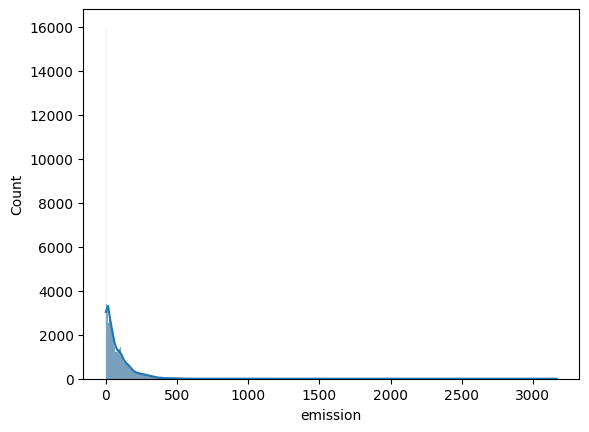

In [14]:
sns.histplot(data = train, x = 'emission', kde = 'True')

In [15]:
# Combine el entrenamiento y la prueba para una fácil visualización
train_coords = train.drop_duplicates(subset = ['latitude', 'longitude'])
test_coords = test.drop_duplicates(subset = ['latitude', 'longitude'])
train_coords['set_type'], test_coords['set_type'] = 'train', 'test'

all_data = pd.concat([train_coords, test_coords], ignore_index = True)
# Create point geometries

geometry = gpd.points_from_xy(all_data.longitude, all_data.latitude)
geo_df = gpd.GeoDataFrame(all_data[["latitude", "longitude", "set_type"]], geometry = geometry)

# Preview the geopandas df
geo_df.head()

C:\Users\dmard\AppData\Local\Temp\ipykernel_21332\3432548080.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_coords['set_type'], test_coords['set_type'] = 'train', 'test'
C:\Users\dmard\AppData\Local\Temp\ipykernel_21332\3432548080.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_coords['set_type'], test_coords['set_type'] = 'train', 'test'


latitude  longitude set_type                   geometry
0    -0.510     29.290    train  POINT (29.29000 -0.51000)
1    -0.528     29.472    train  POINT (29.47200 -0.52800)
2    -0.547     29.653    train  POINT (29.65300 -0.54700)
3    -0.569     30.031    train  POINT (30.03100 -0.56900)
4    -0.598     29.102    train  POINT (29.10200 -0.59800)

In [22]:
map = folium.Map(location=[-2, 30], tiles = "OpenStreetMap", zoom_start = 8)

heat_data = [[point.xy[1][0], point.xy[0][0]] for point in geo_df.geometry]

heat_data

plugins.HeatMap(heat_data).add_to(map)

map